# Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
# Gerekli kütüphaneleri yükleyelim (Colab genelde TensorFlow yüklü gelir)
!pip install opencv-python matplotlib numpy

# Gerekli import işlemleri
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0  # EfficientNet'i import ettik
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image


# Yüklenen .zip verisini çıkartma

In [ ]:
import zipfile
import os

# Yüklenen zip dosyasının yolunu belirleyin
zip_file = "./datas.zip"  # Manuel olarak yüklediğiniz zip dosyasının adı

# Zip dosyasını çıkarma
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('./dataset')  # Dosyaları "dataset" klasörüne çıkarır

# Çıkarılan klasörleri kontrol etme
print("Klasör içeriği:")
print(os.listdir('./dataset'))

Klasör içeriği:
['train', 'valid', 'test']


# Veri Setini Eğitim ve Doğrulama İçin Hazırlama

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator ile veri artırma ve normalize etme
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim veri setini oluştur
train_generator = train_datagen.flow_from_directory(
    './dataset/train',  # Ana veri seti klasörü
    target_size=(224, 224),  # Görselleri yeniden boyutlandır
    batch_size=32,  # GPU kapasiteniz düşükse 16 yapılabilir
    class_mode='categorical',  # Çok sınıflı sınıflandırma
)

# Doğrulama veri setini oluştur
valid_generator = valid_datagen.flow_from_directory(
    './dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

# Test veri setini oluştur
test_generator = test_datagen.flow_from_directory(
    './dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

# # Sınıfları kontrol et
# print("Sınıflar:", train_generator.class_indices)
# print("Sınıflar:", valid_generator.class_indices)
# print("Sınıflar:", test_generator.class_indices)


Found 25136 images belonging to 5 classes.
Found 2812 images belonging to 5 classes.
Found 1649 images belonging to 5 classes.


# Veri artırma yöntemi 2 - Fiziksel yani statik

In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# # Veri artırma için ImageDataGenerator tanımlayın
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     brightness_range=[0.8, 1.2],
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Eğitim veri klasörü
# train_dir = './dataset/train'

# # Her sınıftaki veri sayısını kontrol et
# class_counts = {}
# for class_name in os.listdir(train_dir):
#     class_path = os.path.join(train_dir, class_name)
#     if os.path.isdir(class_path):
#         class_counts[class_name] = len(os.listdir(class_path))

# # En çok veriye sahip sınıfın görüntü sayısını belirle
# max_count = max(class_counts.values())

# print(f"En çok görüntüye sahip sınıf: {max_count} görüntü")
# print(f"Sınıf dağılımı: {class_counts}")

# # Eksik veriler için artırma işlemi
# for class_name, count in class_counts.items():
#     class_path = os.path.join(train_dir, class_name)
#     images = os.listdir(class_path)

#     # Eksik görüntü sayısını hesapla
#     images_needed = max_count - count
#     print(f"{class_name} sınıfı için {images_needed} görüntü artırılacak.")

#     # Veri artırma işlemi
#     i = 0
#     while images_needed > 0:
#         for image_name in images:
#             if images_needed <= 0:
#                 break

#             # Görüntüyü yükle ve dönüştür
#             img_path = os.path.join(class_path, image_name)
#             img = load_img(img_path)
#             img_array = img_to_array(img)
#             img_array = np.expand_dims(img_array, axis=0)

#             # Veri artırma uygula
#             for batch in datagen.flow(img_array, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpg'):
#                 images_needed -= 1
#                 i += 1
#                 if images_needed <= 0:
#                     break

#     print(f"{class_name} sınıfı için artırma işlemi tamamlandı.")

# # ARTIRILMIŞ VERİ SETİNİ YÜKLEME

# # Eğitim veri seti için ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize et
# valid_datagen = ImageDataGenerator(rescale=1./255)  # Doğrulama seti için normalizasyon
# test_datagen = ImageDataGenerator(rescale=1./255)   # Test seti için normalizasyon

# # Eğitim veri setini yükleme
# train_generator = train_datagen.flow_from_directory(
#     './dataset/train',  # Artırılmış eğitim veri seti
#     target_size=(224, 224),  # Görselleri yeniden boyutlandır
#     batch_size=32,
#     class_mode='categorical',
# )

# # Doğrulama veri setini yükleme
# valid_generator = valid_datagen.flow_from_directory(
#     './dataset/valid',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
# )

# # Test veri setini yükleme
# test_generator = test_datagen.flow_from_directory(
#     './dataset/test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
# )

# print("Veri artırma ve yükleme tamamlandı.")


# Dinamik olarak azınlık sınıfların versini artırma

In [ ]:
# import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Veri seti klasörünü tanımlayın
# train_dir = './dataset/train'

# # Her sınıftaki veri sayısını kontrol et
# class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name)))
#                 for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, class_name))}

# # En çok veriye sahip sınıfın görüntü sayısını belirle
# max_count = max(class_counts.values())

# print("Sınıf dağılımı:", class_counts)
# print("En çok görüntüye sahip sınıf:", max_count)

# # Dinamik veri artırma işlemi için ImageDataGenerator
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     brightness_range=[0.8, 1.2],
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# valid_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Azınlık sınıfları belirle ve bunlara özel veri artırma işlemi uygula
# for class_name, count in class_counts.items():
#     if count < max_count:
#         print(f"{class_name} sınıfı için dinamik veri artırma uygulanıyor.")
#         # Azınlık sınıfları için dinamik artırma yapacak şekilde veri yükleme
#         train_generator = train_datagen.flow_from_directory(
#             os.path.join(train_dir, class_name),
#             target_size=(224, 224),
#             batch_size=32,
#             class_mode='categorical'
#         )
#     else:
#         print(f"{class_name} sınıfı için standart veri artırma uygulanıyor.")
#         # Diğer sınıflar için standart veri yükleme
#         train_generator = train_datagen.flow_from_directory(
#             os.path.join(train_dir, class_name),
#             target_size=(224, 224),
#             batch_size=32,
#             class_mode='categorical'
#         )

# # Doğrulama veri setini oluştur
# valid_generator = valid_datagen.flow_from_directory(
#     './dataset/valid',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
# )

# # Test veri setini oluştur
# test_generator = test_datagen.flow_from_directory(
#     './dataset/test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
# )


# Transfer Öğrenme ile Model Hazırlama - EffecientB0

In [ ]:
# EfficientNet-B0 modelini yükleme (önceden eğitilmiş model)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# İlk katmanları dondur, son 10 katmanı serbest bırak
# for layer in base_model.layers:
#     layer.trainable = False  # Tüm katmanları dondur
for layer in base_model.layers[-20:]:
    layer.trainable = True  # Sadece son 10 katmanı serbest bırak

# Yeni katmanları ekle
model = Sequential([
    base_model,  # Önceden eğitilmiş EfficientNet-B0 modeli
    Flatten(),   # Özellik haritalarını düzleştir
    Dense(512, activation='relu'),  # Yoğun katman (256 nöronlu)
    Dropout(0.5),  # Dropout ile overfitting'i önle (%50)
    Dense(train_generator.num_classes, activation='softmax')  # Çıkış katmanı (sınıf sayısına göre)
])

# Modeli derleme
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Küçük bir öğrenme oranı
    loss='categorical_crossentropy',  # Çok sınıflı sınıflandırma için uygun kayıp fonksiyonu
    metrics=['accuracy']  # Doğruluk metriğini kullan
)

# Model Eğitme

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# # Early Stopping tanımlama
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Doğrulama kaybını izler
#     patience=5,          # İyileşme olmazsa 5 epoch sonra durur
#     restore_best_weights=True  # En iyi ağırlıkları geri yükler
# )

# # Model Checkpoint tanımlama
# model_checkpoint = ModelCheckpoint(
#     'best_model_efficientnetb0.weights.h5',  # Yalnızca ağırlıkları kaydetmek için dosya adı
#     monitor='val_loss',                      # Doğrulama kaybını izler
#     save_best_only=True,                     # Sadece en iyi modeli kaydeder
#     save_weights_only=True,                  # Yalnızca ağırlıkları kaydeder
#     verbose=1                                # Kaydetme işlemi sırasında bilgi verir
# )

# # ReduceLROnPlateau tanımlama
# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',  # Doğrulama kaybını izler
#     factor=0.3,          # Öğrenme oranını daha az agresif düşür
#     patience=3,          # 3 epoch boyunca iyileşme olmazsa devreye girer
#     verbose=1
# )

# # TensorBoard tanımlama
# tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

# # steps_per_epoch ve validation_steps
# steps_per_epoch = train_generator.samples // train_generator.batch_size
# validation_steps = valid_generator.samples // valid_generator.batch_size

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
]

# Model eğitimi
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,  # Daha fazla epoch ile doğruluğu artırabilirsiniz
    # steps_per_epoch=steps_per_epoch,
    # validation_steps=validation_steps,
    callbacks=callbacks  # Callbacks ekleniyor
)


Epoch 1/20
786/786 ━━━━━━━━━━━━━━━━━━━━ 505s 540ms/step - accuracy: 0.7228 - loss: 0.8708 - val_accuracy: 0.8236 - val_loss: 0.4781 - learning_rate: 1.0000e-04
Epoch 2/20
786/786 ━━━━━━━━━━━━━━━━━━━━ 378s 477ms/step - accuracy: 0.8339 - loss: 0.4641 - val_accuracy: 0.8453 - val_loss: 2.3401 - learning_rate: 1.0000e-04
Epoch 3/20
786/786 ━━━━━━━━━━━━━━━━━━━━ 376s 475ms/step - accuracy: 0.8655 - loss: 0.3809 - val_accuracy: 0.8606 - val_loss: 1.7582 - learning_rate: 1.0000e-04
Epoch 4/20
786/786 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.8801 - loss: 0.3396
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
786/786 ━━━━━━━━━━━━━━━━━━━━ 377s 475ms/step - accuracy: 0.8801 - loss: 0.3396 - val_accuracy: 0.8599 - val_loss: 1.9035 - learning_rate: 1.0000e-04
Epoch 5/20
786/786 ━━━━━━━━━━━━━━━━━━━━ 376s 475ms/step - accuracy: 0.8954 - loss: 0.2984 - val_accuracy: 0.8702 - val_loss: 1.4294 - learning_rate: 5.0000e-05
Epoch 6/20
786/786 ━━━━━━━━━━━━━━━━━━━━ 382s 47

# Eğitim Sonuçlarını Görselleştirme / Modelin eğitim ve doğrulama doğruluğunu/kaybını görselleştirme

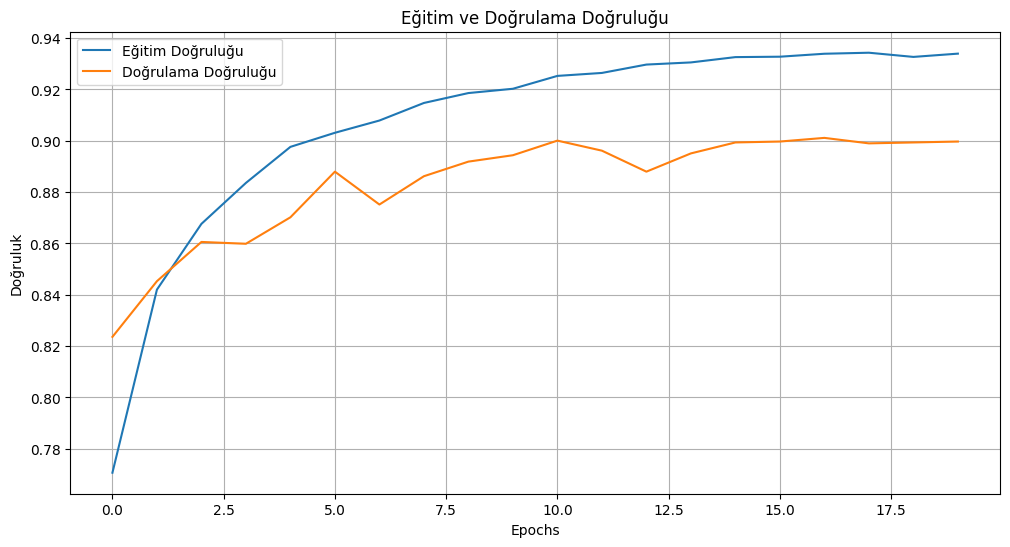

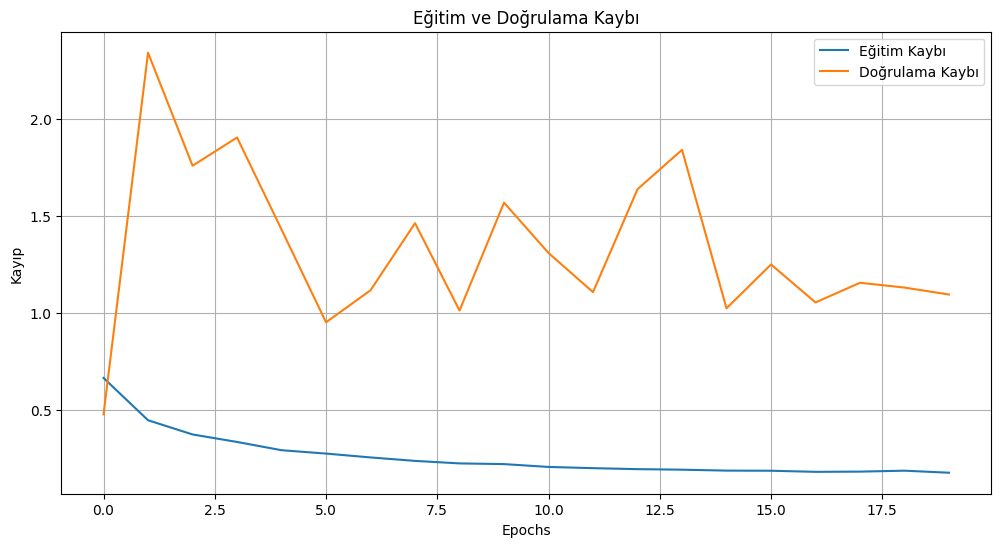

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu grafiği
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid()
plt.show()

# Eğitim ve doğrulama kaybı grafiği
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.grid()
plt.show()


# Test verisi üzerinde tahmin

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


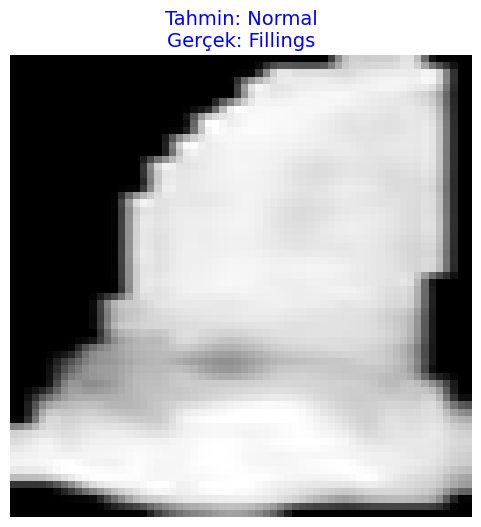

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Test için bir resim seçin
image_path = '/content/dataset/test/Fillings/0061_jpg.rf.3188dc5179f4b6d600459b1aeba93e87_segment_128.png'  # Test klasöründen bir resim yolu

# Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# Resmi yükleme ve ön işleme
IMG_SIZE = 224  # Model giriş boyutu
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# Model tahmini yap
predictions = model.predict(image_array)
predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
predicted_class = class_labels[predicted_class_idx]

# Görselleştirme ve tahmin sonuçları
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))  # Orijinal resmi göster
plt.axis('off')
plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


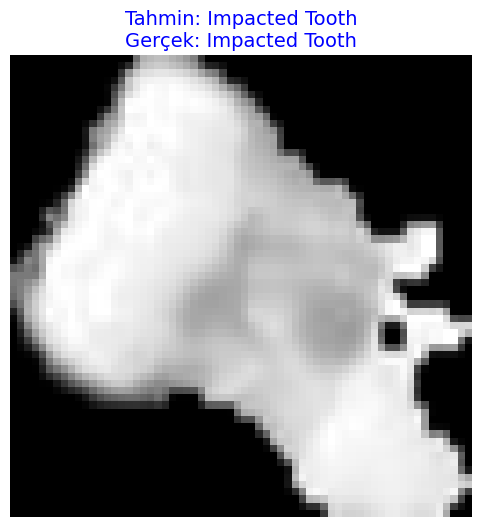

Tahmin yüzdeleri:
Cavity: 0.47%
Fillings: 0.29%
Impacted Tooth: 75.48%
Implant: 0.00%
Normal: 23.76%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Test için bir resim seçin
image_path = '/content/dataset/test/Impacted Tooth/0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7_segment_460.png'  # Test klasöründen bir resim yolu

# Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# Resmi yükleme ve ön işleme
IMG_SIZE = 224  # Model giriş boyutu
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# Model tahmini yap
predictions = model.predict(image_array)
predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
predicted_class = class_labels[predicted_class_idx]

# Tüm tahminlerin yüzdeleri
probabilities = predictions[0] * 100  # Yüzdelik değerlere çevir
probabilities_dict = {class_labels[idx]: prob for idx, prob in enumerate(probabilities)}

# Görselleştirme ve tahmin sonuçları
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))  # Orijinal resmi göster
plt.axis('off')
plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
plt.show()

# Tüm sınıfların tahmin yüzdelerini yazdır
print("Tahmin yüzdeleri:")
for class_name, prob in probabilities_dict.items():
    print(f"{class_name}: {prob:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


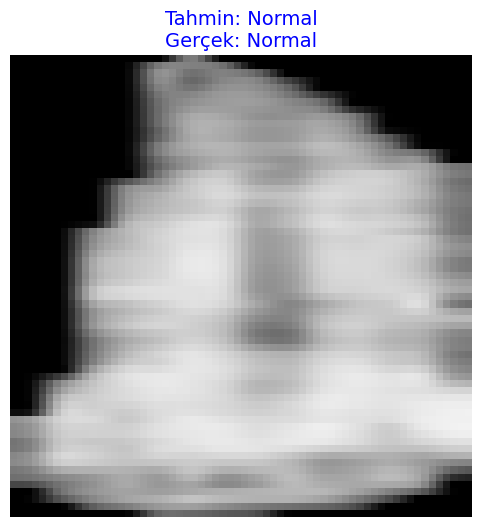

Tahmin yüzdeleri:
Cavity: 1.50%
Fillings: 1.31%
Impacted Tooth: 0.00%
Implant: 0.00%
Normal: 97.18%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Test için bir resim seçin
image_path = '/content/dataset/test/Normal/0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1_segment_11.png'  # Test klasöründen bir resim yolu

# Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# Resmi yükleme ve ön işleme
IMG_SIZE = 224  # Model giriş boyutu
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# Model tahmini yap
predictions = model.predict(image_array)
predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
predicted_class = class_labels[predicted_class_idx]

# Tüm tahminlerin yüzdeleri
probabilities = predictions[0] * 100  # Yüzdelik değerlere çevir
probabilities_dict = {class_labels[idx]: prob for idx, prob in enumerate(probabilities)}

# Görselleştirme ve tahmin sonuçları
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))  # Orijinal resmi göster
plt.axis('off')
plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
plt.show()

# Tüm sınıfların tahmin yüzdelerini yazdır
print("Tahmin yüzdeleri:")
for class_name, prob in probabilities_dict.items():
    print(f"{class_name}: {prob:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


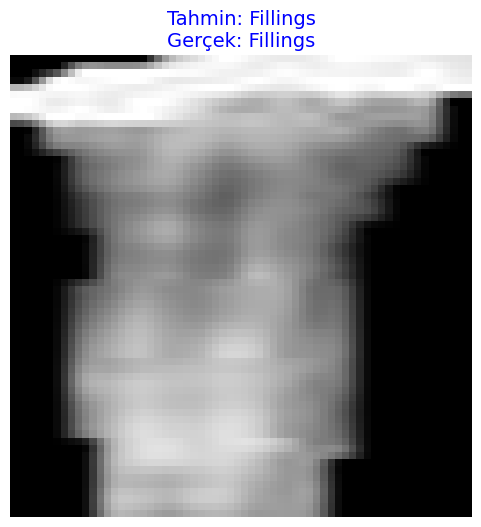

Tahmin yüzdeleri:
Cavity: 0.00%
Fillings: 92.79%
Impacted Tooth: 0.00%
Implant: 0.00%
Normal: 7.21%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Test için bir resim seçin
image_path = '/content/dataset/test/Fillings/0156_jpg.rf.c3b593c25483534b0ad835ee21f62d59_segment_397.png'  # Test klasöründen bir resim yolu

# Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# Resmi yükleme ve ön işleme
IMG_SIZE = 224  # Model giriş boyutu
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# Model tahmini yap
predictions = model.predict(image_array)
predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
predicted_class = class_labels[predicted_class_idx]

# Tüm tahminlerin yüzdeleri
probabilities = predictions[0] * 100  # Yüzdelik değerlere çevir
probabilities_dict = {class_labels[idx]: prob for idx, prob in enumerate(probabilities)}

# Görselleştirme ve tahmin sonuçları
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))  # Orijinal resmi göster
plt.axis('off')
plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
plt.show()

# Tüm sınıfların tahmin yüzdelerini yazdır
print("Tahmin yüzdeleri:")
for class_name, prob in probabilities_dict.items():
    print(f"{class_name}: {prob:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


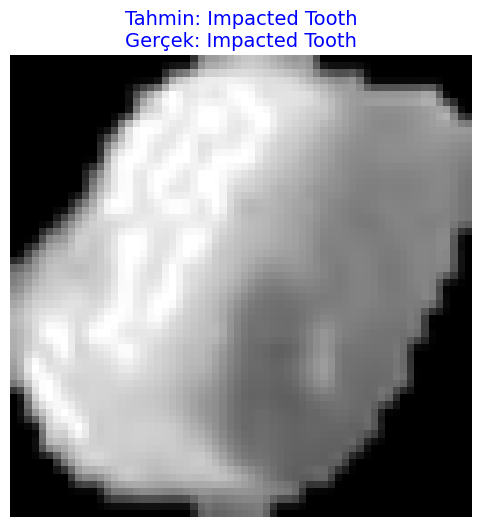

Tahmin yüzdeleri:
Cavity: 0.00%
Fillings: 0.00%
Impacted Tooth: 98.61%
Implant: 0.00%
Normal: 1.39%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Test için bir resim seçin
image_path = '/content/dataset/test/Impacted Tooth/0906_jpg.rf.733b4ff98bf8afd4ea6aa34d17051fd4_segment_187.png'  # Test klasöründen bir resim yolu

# Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# Resmi yükleme ve ön işleme
IMG_SIZE = 224  # Model giriş boyutu
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# Model tahmini yap
predictions = model.predict(image_array)
predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
predicted_class = class_labels[predicted_class_idx]

# Tüm tahminlerin yüzdeleri
probabilities = predictions[0] * 100  # Yüzdelik değerlere çevir
probabilities_dict = {class_labels[idx]: prob for idx, prob in enumerate(probabilities)}

# Görselleştirme ve tahmin sonuçları
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))  # Orijinal resmi göster
plt.axis('off')
plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
plt.show()

# Tüm sınıfların tahmin yüzdelerini yazdır
print("Tahmin yüzdeleri:")
for class_name, prob in probabilities_dict.items():
    print(f"{class_name}: {prob:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


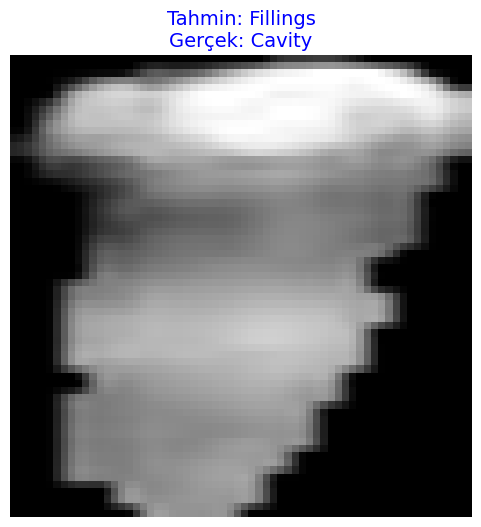

Tahmin yüzdeleri:
Cavity: 0.07%
Fillings: 99.08%
Impacted Tooth: 0.00%
Implant: 0.00%
Normal: 0.84%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Test için bir resim seçin
image_path = '/content/dataset/test/Cavity/0905_jpg.rf.93c5b0e9d232f394f6cedf1c8f3879f4_segment_198.png'  # Test klasöründen bir resim yolu

# Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# Resmi yükleme ve ön işleme
IMG_SIZE = 224  # Model giriş boyutu
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# Model tahmini yap
predictions = model.predict(image_array)
predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
predicted_class = class_labels[predicted_class_idx]

# Tüm tahminlerin yüzdeleri
probabilities = predictions[0] * 100  # Yüzdelik değerlere çevir
probabilities_dict = {class_labels[idx]: prob for idx, prob in enumerate(probabilities)}

# Görselleştirme ve tahmin sonuçları
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))  # Orijinal resmi göster
plt.axis('off')
plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
plt.show()

# Tüm sınıfların tahmin yüzdelerini yazdır
print("Tahmin yüzdeleri:")
for class_name, prob in probabilities_dict.items():
    print(f"{class_name}: {prob:.2f}%")


# En iyi ağırlıklarla çalıştırma

In [ ]:
# # Kaydedilen en iyi ağırlıkları yükleme
# model.load_weights('best_model_efficientnetb0.weights.h5')
# print("En iyi model ağırlıkları başarıyla yüklendi.")

# # Test için bir resim seçin
# image_path = './dataset/test/Normal/0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1_segment_10.png'  # Test klasöründen bir resim yolu

# # Gerçek sınıfı elde et (test klasöründeki alt klasör ismi gerçek sınıfı temsil eder)
# true_class = image_path.split('/')[-2]  # Dosya yolundan alt klasör ismini al

# # Resmi yükleme ve ön işleme
# IMG_SIZE = 224  # Model giriş boyutu
# image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Görüntüyü yükle ve yeniden boyutlandır
# image_array = img_to_array(image) / 255.0  # Görüntüyü normalize et (0-1 aralığına)
# image_array = np.expand_dims(image_array, axis=0)  # Batch boyutu ekle

# # Model tahmini yap
# predictions = model.predict(image_array)
# predicted_class_idx = np.argmax(predictions)  # Tahmin edilen sınıfın indeksi
# class_labels = {v: k for k, v in train_generator.class_indices.items()}  # İndeksi sınıf ismine eşleştir
# predicted_class = class_labels[predicted_class_idx]

# # Görselleştirme ve tahmin sonuçları
# plt.figure(figsize=(6, 6))
# plt.imshow(load_img(image_path))  # Orijinal resmi göster
# plt.axis('off')
# plt.title(f"Tahmin: {predicted_class}\nGerçek: {true_class}", fontsize=14, color='blue')
# plt.show()
